<a href="https://colab.research.google.com/github/cras-lab/erc20/blob/main/extrapolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

필요한 모듈 임포트

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sklearn ML 라이버러리 로드

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train = np.arange(0,100,0.5) # 0과 100사이를 0.5 간격으로 균일하게 생성
y_train = np.sin(X_train)

X_test = np.arange(100,200,0.5)
y_test = np.sin(X_test)

n_features = 1

train_series = y_train.reshape( (len(y_train,), n_features) )
test_series = y_test.reshape( (len(y_test), n_features) )

**그림** 도식화

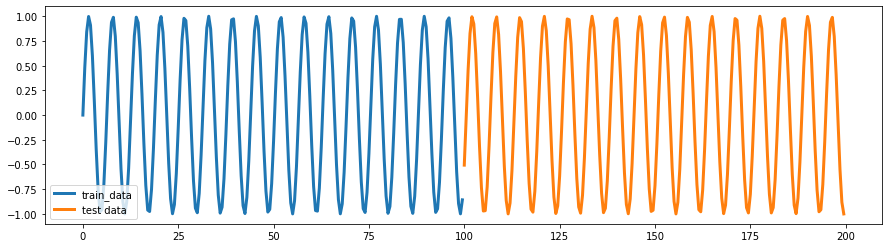

In [ ]:
fig, ax = plt.subplots( 1,1, figsize=(15,4))
ax.plot( X_train, y_train, lw=3, label="train_data")
ax.plot( X_test, y_test, lw=3, label="test data")
ax.legend( loc="lower left")
plt.show()

TimeSeriesGenerator는 시계열 데이터 처리를 쉽게하기 위한 구조로 자동변환

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
look_back = 20

train_generator = TimeseriesGenerator( train_series, train_series, 
                                      length=look_back,
                                      batch_size=10)

test_generator = TimeseriesGenerator( test_series, test_series,
                                     length=look_back,
                                     batch_size=10)

LSTM 신경망 구축 후 훈련

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

n_neurons = 4
model = Sequential()
model.add( LSTM( n_neurons, input_shape=(look_back, n_features)))
model.add( Dense(1))
model.compile( optimizer='adam', loss='mse')

model.fit( train_generator, epochs=100, verbose=0 )

test_prediction = model.predict( test_generator )

18/18 [==============================] - 0s 2ms/step


출력을 생성

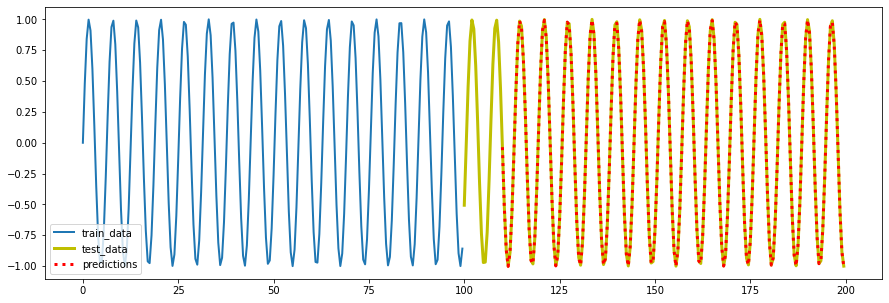

In [ ]:
x = np.arange( 110,200, 0.5)

fig, ax = plt.subplots( 1,1, figsize= (15,5 ))
ax.plot( X_train, y_train, lw=2, label='train_data')
ax.plot( X_test, y_test, lw=3, c='y', label='test_data')
ax.plot( x, test_prediction, lw=3, c='r', linestyle=':' , label = 'predictions')
ax.legend( loc='lower left')
plt.show()